# Classification for multiple classes based on softmax and cross entropy

## import libraries

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

## load data

In [129]:
#directory_data  = './data/'
filename_data   = 'assignment_04_data.npz'
data            = np.load(os.path.join(filename_data))

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('number of training image :', x_train.shape[0])
print('height of training image :', x_train.shape[1])
print('width of training image :', x_train.shape[2])
print('*************************************************')
print('number of testing image :', x_test.shape[0])
print('height of testing image :', x_test.shape[1])
print('width of testing image :', x_test.shape[2])
print('*************************************************')

*************************************************
size of x_train : (10000, 28, 28)
size of y_train : (10000, 5)
*************************************************
size of x_test : (4500, 28, 28)
size of y_test : (4500, 5)
*************************************************
number of training image : 10000
height of training image : 28
width of training image : 28
*************************************************
number of testing image : 4500
height of testing image : 28
width of testing image : 28
*************************************************


## number of classes

In [130]:
nClass = y_train.shape[1]
print('number of classes: ', nClass)

number of classes:  5


## label data

In [131]:
print('label data for training image 0: ', y_train[0])
print('label data for training image 1: ', y_train[2000])
print('label data for training image 2: ', y_train[4000])
print('label data for training image 3: ', y_train[6000])
print('label data for training image 4: ', y_train[8000])

label data for training image 0:  [1. 0. 0. 0. 0.]
label data for training image 1:  [0. 1. 0. 0. 0.]
label data for training image 2:  [0. 0. 1. 0. 0.]
label data for training image 3:  [0. 0. 0. 1. 0.]
label data for training image 4:  [0. 0. 0. 0. 1.]


## vectorize image data

In [132]:
vector_x_train  = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vector_x_test   = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

print('dimension of the training data matrix: ', vector_x_train.shape)
print('dimension of the testing data matrix: ', vector_x_test.shape)

print('dimension of the trainin label data: ', y_train.shape)
print('dimension of the testing label data: ', y_test.shape)

dimension of the training data matrix:  (10000, 784)
dimension of the testing data matrix:  (4500, 784)
dimension of the trainin label data:  (10000, 5)
dimension of the testing label data:  (4500, 5)


## index for each class

In [133]:
index_train = [[], [], [],[],[]]
index_test  = [[], [], [],[],[]]

number_index_train  = np.zeros(nClass)
number_index_test   = np.zeros(nClass)
num2000 = 0
num900 = 0
for i in range(nClass):

    index_train[i] = np.array(range(8)) + num2000
    index_test[i] = np.array(range(8)) + num900
    num2000+=2000
    num900+=900
    number_index_train[i]   = 2000
    number_index_test[i]    = 900

print('number of training images for each class: ', number_index_train)
print('number of testing images for each class: ', number_index_test)

number of training images for each class:  [2000. 2000. 2000. 2000. 2000.]
number of testing images for each class:  [900. 900. 900. 900. 900.]


## plot data

In [134]:
def plot_data_grid(data, index_data, nRow, nCol):

    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [135]:
nRow    = 2
nCol    = 4
nPlot   = nRow * nCol

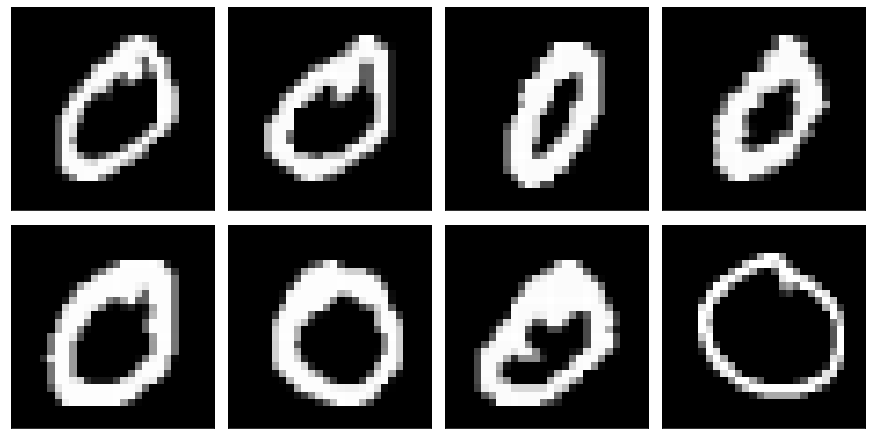

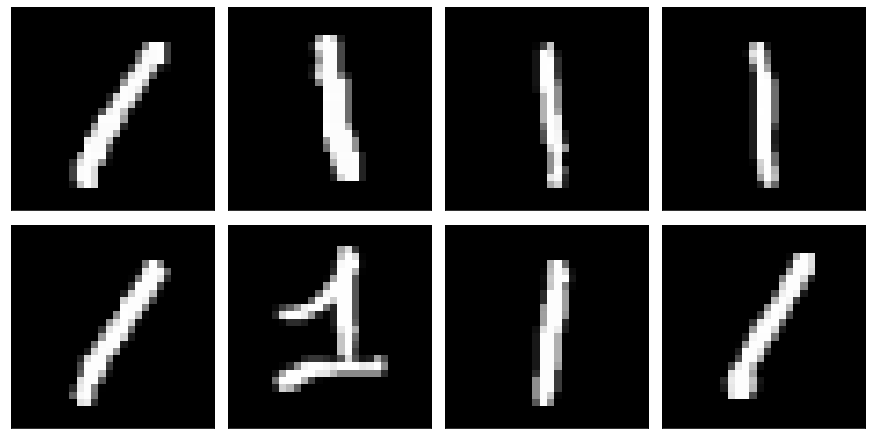

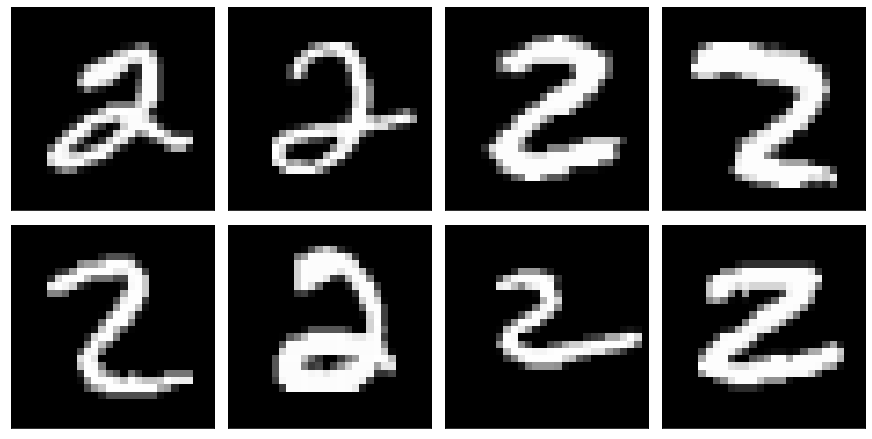

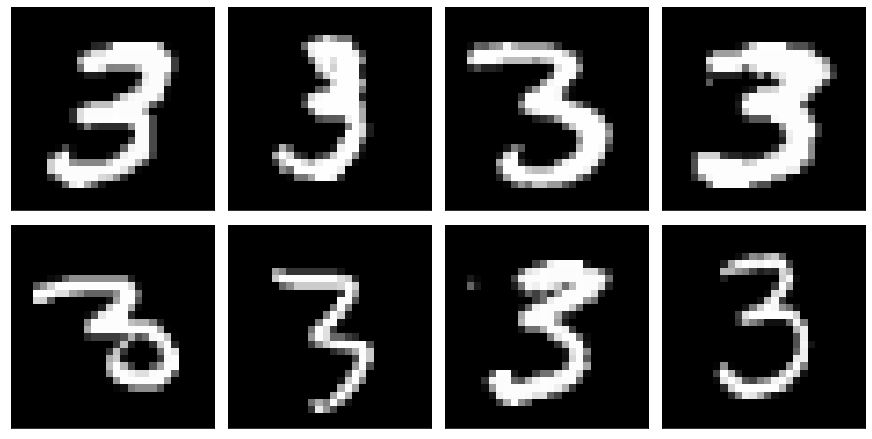

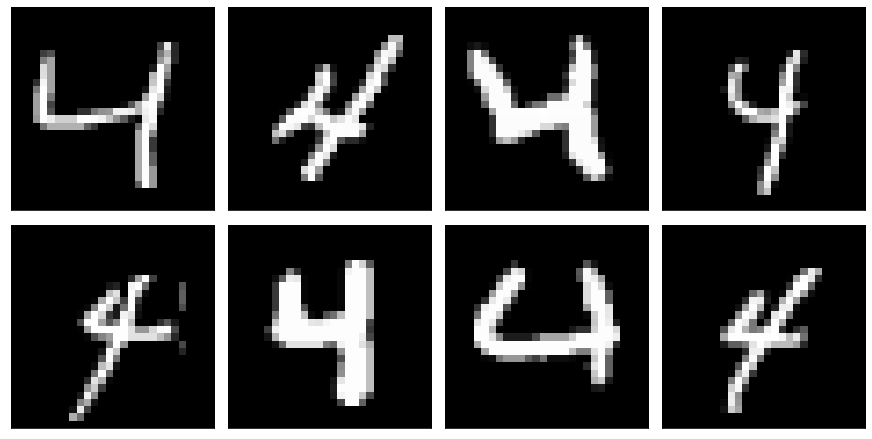

In [136]:
for i in range(nClass):

    index_class_plot = index_train[i][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)

## linear layer

In [158]:
def layer_linear(input, weight):

    output = np.matmul(weight, input)

    return output

## Softmax function

In [159]:
def activation_softmax(input):

    exp_input = np.exp(input) 
    output = exp_input / np.sum(exp_input)
    
    return output

## compute prediction by the forward propagation of the neural network

In [160]:
def compute_prediction(input, weight):

    output      = layer_linear(input, weight)
    prediction  = activation_softmax(output)

    return prediction

## compute loss function

In [251]:
def compute_loss(prediction, label):
    
    z = prediction * label
    
    z_log = np.log(prediction[np.arange(prediction.shape[0]), np.argmax(label, axis=1)])
    
    loss = -1 * np.sum(z_log)
    loss = loss / label.shape[0]
    return loss

## compute gradient

In [203]:
def compute_gradient(input, prediction, label):
    prediction[np.arange(prediction.shape[0]), np.argmax(label, axis=1)] -= 1
    gradient = np.dot(input.transpose(), prediction) / label.shape[0]
    gradient = gradient.T
    prediction[np.arange(prediction.shape[0]), np.argmax(label, axis=1)] +=1
    
    return gradient

## compute accuracy

In [199]:
def compute_accuracy(prediction, label):

    s = 0
    
    for i in range(label.shape[0]):
        
        if(prediction[i].argmax() == label[i].argmax()):
            s+=1
            
    accuracy    = s /label.shape[0]

    return accuracy

## initialize weight

In [164]:
dim_input   = vector_x_train.shape[1]
dim_output  = nClass
weight      = np.ones((dim_output, dim_input))
weight      = weight * 0.001

print('size of weights: ', weight.shape)

size of weights:  (5, 784)


## hyper-parameters

In [165]:
number_iteration    = 2000
learning_rate       = 0.5 

## variables for optimization information

In [166]:
loss_train_iteration        = np.zeros(number_iteration)
loss_test_iteration         = np.zeros(number_iteration)

accuracy_train_iteration    = np.zeros(number_iteration)
accuracy_test_iteration     = np.zeros(number_iteration)

pred_train_mean_iteration   = np.zeros((nClass, number_iteration)) 
pred_train_std_iteration    = np.zeros((nClass, number_iteration)) 
pred_test_mean_iteration    = np.zeros((nClass, number_iteration)) 
pred_test_std_iteration     = np.zeros((nClass, number_iteration)) 

## gradient descent iterations

In [283]:
for i in tqdm(range(number_iteration)):
   
    prediction_train = np.zeros((10000, 5))
    prediction_test  = np.zeros((4500, 5))
    for k in range(10000):
        prediction_train[k] = compute_prediction(vector_x_train[k], weight)
        if(k<4500):
            prediction_test[k] = compute_prediction(vector_x_test[k], weight)
            
    gradient_train      = compute_gradient(vector_x_train, prediction_train, y_train)

    weight = weight -learning_rate * gradient_train

    loss_train          = compute_loss(prediction_train, y_train)
    loss_test           = compute_loss(prediction_test, y_test)
    
    accuracy_train      = compute_accuracy(prediction_train, y_train)
    accuracy_test       = compute_accuracy(prediction_test, y_test)
    
    pr2000 = 0
    pr900 = 0
    
    for j in range(nClass):
        
        pred_train    = prediction_train[pr2000:pr2000 + 2000]
        pred_test     = prediction_test[pr900:pr900+900]
        pr2000 += 2000
        pr900 += 900
        pred_train_mean_iteration[j, i] = np.mean(pred_train)
        pred_train_std_iteration[j, i]  = np.std(pred_train)
        
        pred_test_mean_iteration[j, i]  = np.mean(pred_test)
        pred_test_std_iteration[j, i]   = np.std(pred_test)
    
    loss_train_iteration[i]         = loss_train
    loss_test_iteration[i]          = loss_test

    accuracy_train_iteration[i]     = accuracy_train 
    accuracy_test_iteration[i]      = accuracy_test

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [09:16<00:00,  3.60it/s]


## plot curve

In [256]:
def plot_curve(data, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data)), data, '-', color='red')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [257]:
def plot_curve2(data1, label_data1, data2, label_data2, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [286]:
def plot_curve_error(data_mean, data_std, x_label, y_label, title):

    plt.figure(figsize=(8, 6))
    plt.title(title)
    data_mean = data_mean.T
    data_std = data_std.T
    
    alpha = 0.3
    
    plt.plot(range(len(data_mean)), data_mean, '-', color = 'red')
    plt.fill_between(range(len(data_mean)), data_mean - data_std, data_mean + data_std, facecolor = 'blue', alpha = alpha) 
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [259]:
def plot_curve_error2(data1_mean, data1_std, data1_label, data2_mean, data2_std, data2_label, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3
    
    plt.plot(range(len(data1_mean)), data1_mean, '-', color = 'blue', label = data1_label)
    plt.fill_between(range(len(data1_mean)), data1_mean - data1_std, data1_mean + data1_std, facecolor = 'blue', alpha = alpha)

    plt.plot(range(len(data2_mean)), data2_mean, '-', color = 'red', label = data2_label)
    plt.fill_between(range(len(data2_mean)), data2_mean - data2_std, data2_mean + data2_std, facecolor = 'red', alpha = alpha)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

## loss (training) curve

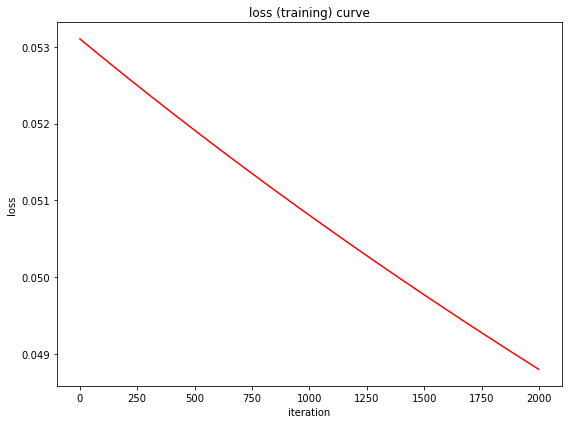

In [260]:
plot_curve(loss_train_iteration, 'iteration', 'loss', 'loss (training) curve')

## loss (testing) curve

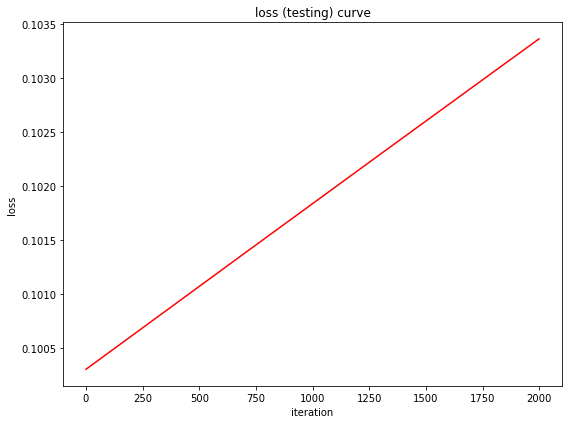

In [261]:
plot_curve(loss_test_iteration, 'iteration', 'loss', 'loss (testing) curve')

## accuracy (training) curve

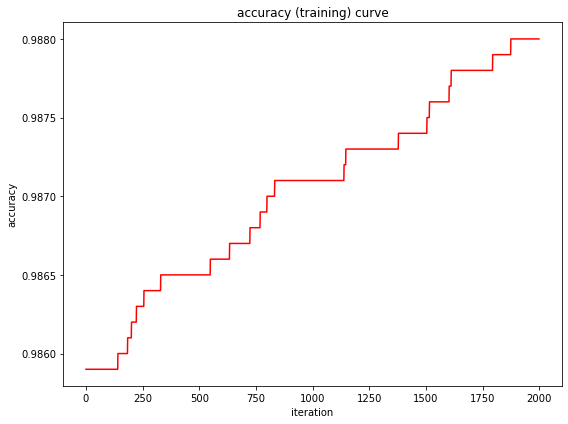

In [262]:
plot_curve(accuracy_train_iteration, 'iteration', 'accuracy', 'accuracy (training) curve')

## accuracy (testing) curve

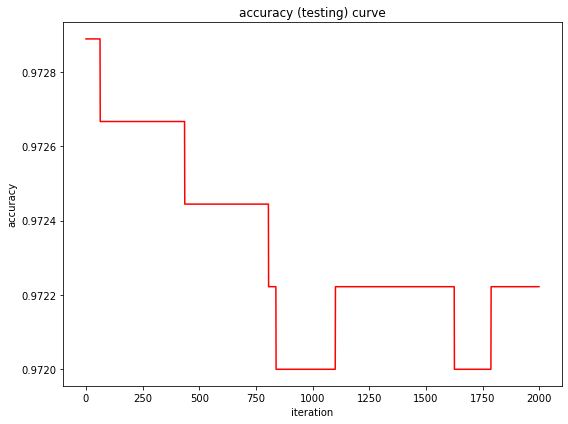

In [263]:
plot_curve(accuracy_test_iteration, 'iteration', 'accuracy', 'accuracy (testing) curve')

## plot prediction values

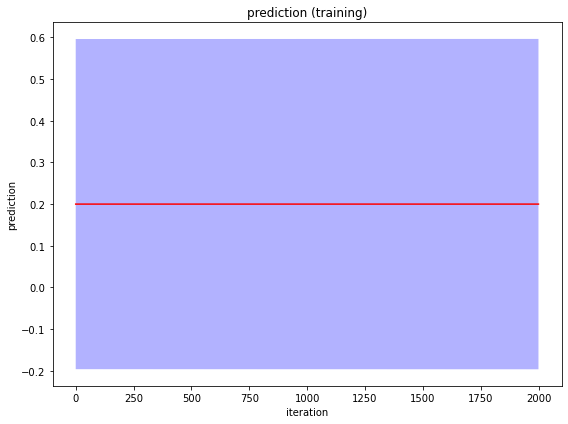

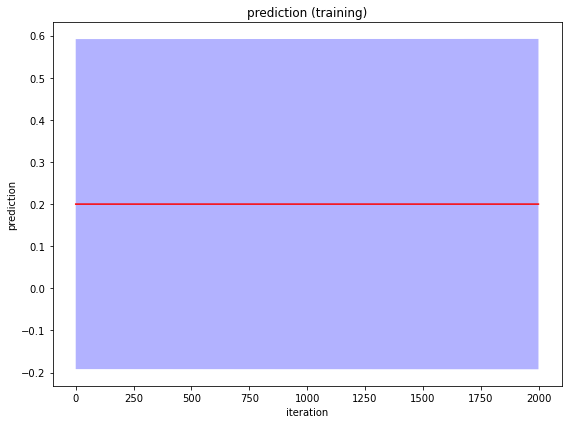

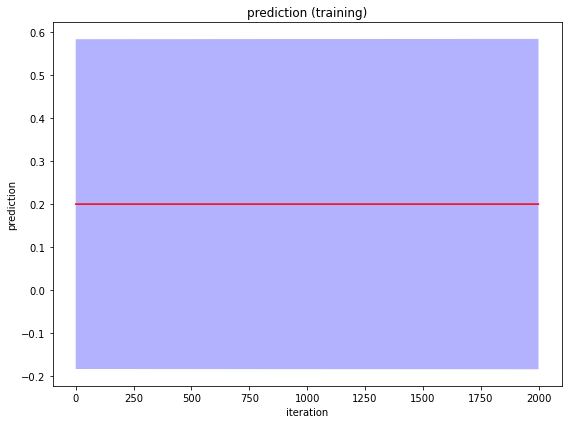

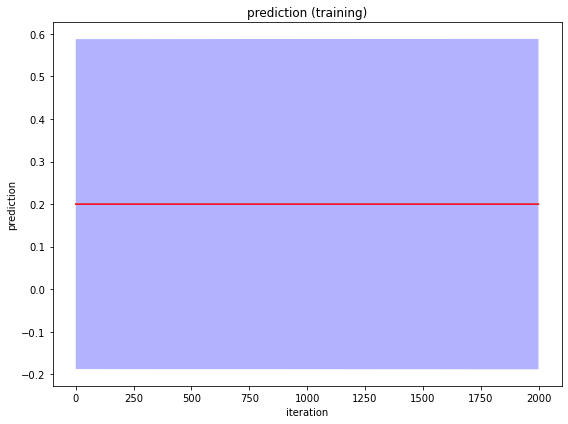

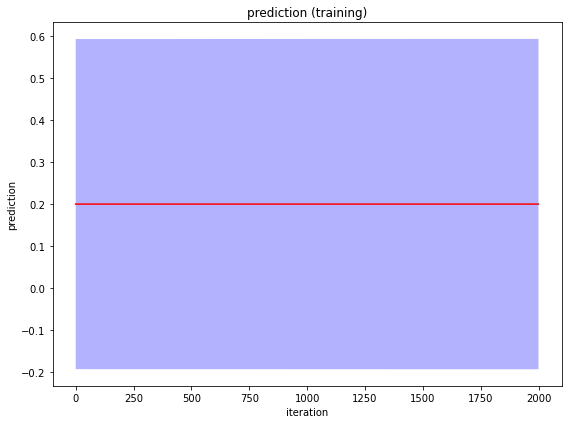

In [292]:
for i in range(nClass):
    
    plot_curve_error(pred_train_mean_iteration[i], pred_train_std_iteration[i], 'iteration', 'prediction', 'prediction (training)')

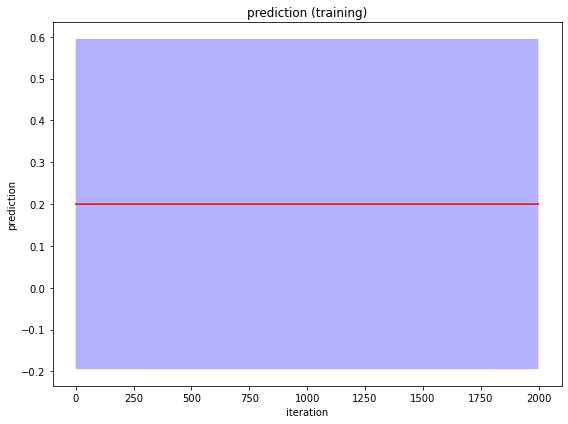

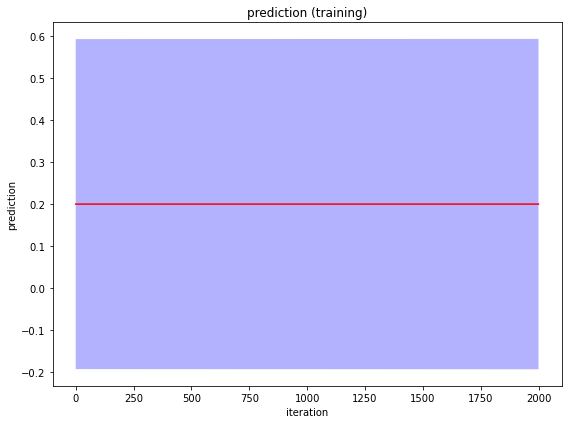

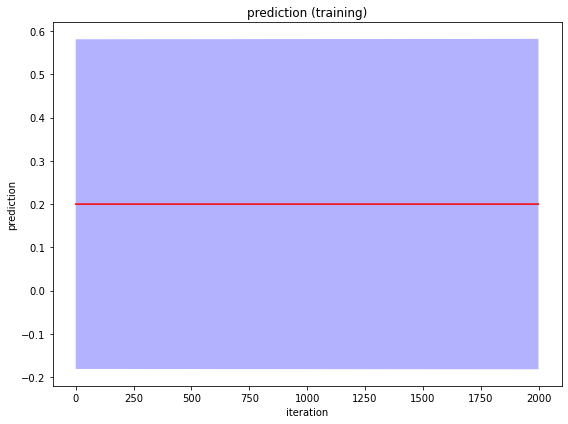

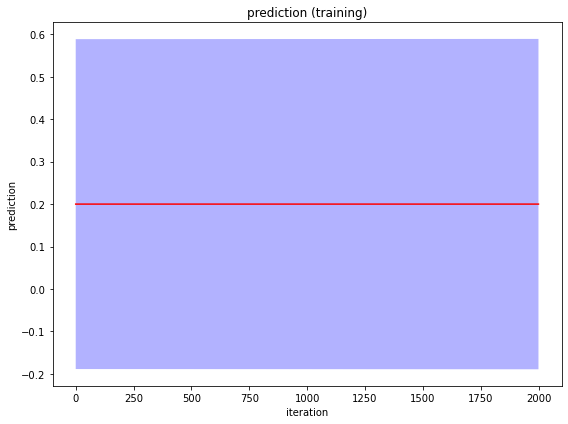

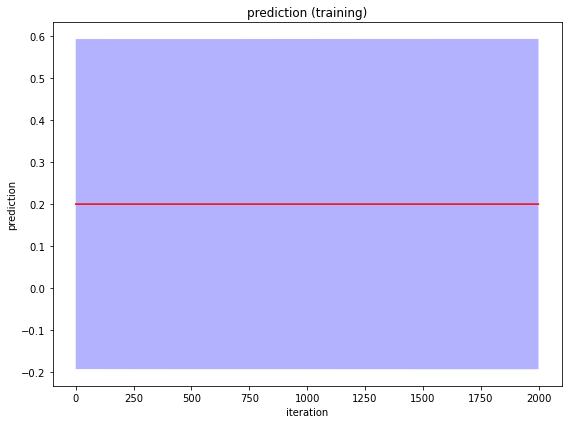

In [265]:
for i in range(nClass):
    
    plot_curve_error(pred_test_mean_iteration[i], pred_test_std_iteration[i], 'iteration', 'prediction', 'prediction (training)')

## print values

In [293]:
def print_curve(data, index):

    for i in range(len(index)):

        idx = index[i]
        val = data[idx]

        print('index = %4d, value = %12.10f' % (idx, val))

## given iterations at which the values are presented

In [294]:
index = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

## training loss

In [295]:
print_curve(loss_train_iteration, index)

index =    0, value = 0.0486735511
index =  100, value = 0.0484873231
index =  200, value = 0.0483032392
index =  300, value = 0.0481212505
index =  400, value = 0.0479413096
index =  500, value = 0.0477633708
index =  600, value = 0.0475873900
index =  700, value = 0.0474133244
index =  800, value = 0.0472411328
index =  900, value = 0.0470707753


## testing loss

In [296]:
print_curve(loss_test_iteration, index)

index =    0, value = 0.1034614761
index =  100, value = 0.1036135559
index =  200, value = 0.1037655181
index =  300, value = 0.1039173595
index =  400, value = 0.1040690772
index =  500, value = 0.1042206683
index =  600, value = 0.1043721298
index =  700, value = 0.1045234590
index =  800, value = 0.1046746530
index =  900, value = 0.1048257092


## training accuracy

In [297]:
print_curve(accuracy_train_iteration, index)

index =    0, value = 0.9881000000
index =  100, value = 0.9884000000
index =  200, value = 0.9885000000
index =  300, value = 0.9886000000
index =  400, value = 0.9886000000
index =  500, value = 0.9886000000
index =  600, value = 0.9887000000
index =  700, value = 0.9887000000
index =  800, value = 0.9887000000
index =  900, value = 0.9888000000


## testing accuracy

In [298]:
print_curve(accuracy_test_iteration, index)

index =    0, value = 0.9724444444
index =  100, value = 0.9724444444
index =  200, value = 0.9724444444
index =  300, value = 0.9722222222
index =  400, value = 0.9722222222
index =  500, value = 0.9717777778
index =  600, value = 0.9717777778
index =  700, value = 0.9717777778
index =  800, value = 0.9715555556
index =  900, value = 0.9715555556


## functions for presenting the results

In [303]:
def function_results_01(data, index_data, nRow, nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()
    pass

In [304]:
def function_results_02(data, index_data, nRow, nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()
    pass

In [305]:
def function_results_03(data, index_data, nRow, nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()
    pass

In [306]:
def function_results_04(data, index_data, nRow, nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()
    pass

In [312]:
def function_results_05(data, index_data, nRow, nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()
    pass

In [316]:
def function_results_06(data, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data)), data, '-', color='red')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()
    pass

In [317]:
def function_results_07(data, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data)), data, '-', color='red')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()
    pass

In [320]:
def function_results_08(data, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data)), data, '-', color='red')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()
    pass

In [321]:
def function_results_09(data, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data)), data, '-', color='red')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()
    pass

In [ ]:
def function_results_10(*args):
    
    pass

In [ ]:
def function_results_11(*args):
    
    pass

In [ ]:
def function_results_12(*args):
    
    pass

In [ ]:
def function_results_13(*args):
    
    pass

---

# RESULTS

---

## # 01. plot the input images for '0'

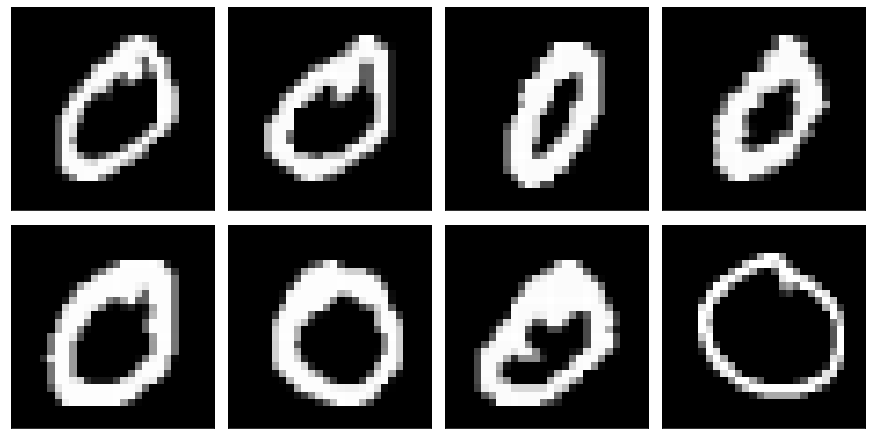

In [307]:
function_results_01(x_train, index_train[0][0:nPlot], nRow, nCol)

## # 02. plot the input images for '1'

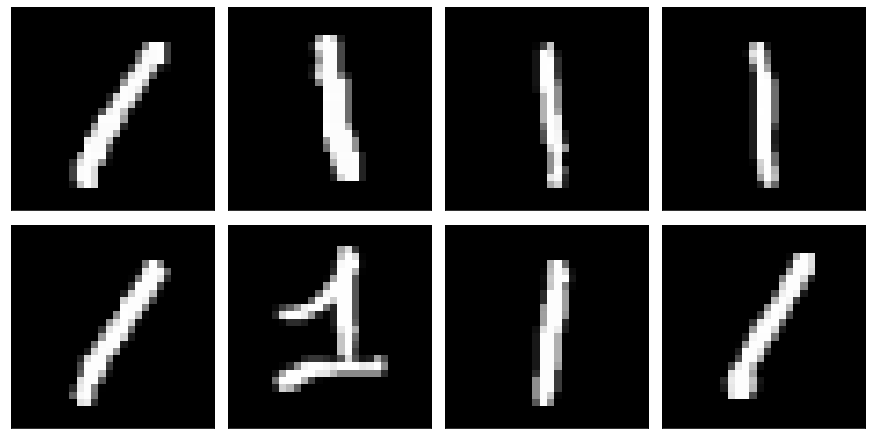

In [308]:
function_results_02(x_train, index_train[1][0:nPlot], nRow, nCol)

## # 03. plot the input images for '2'

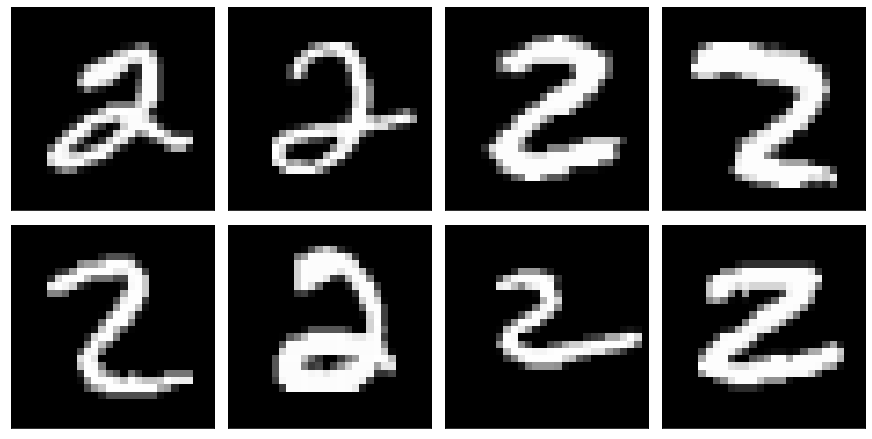

In [309]:
function_results_03(x_train, index_train[2][0:nPlot], nRow, nCol)

## # 04. plot the input images for '3'

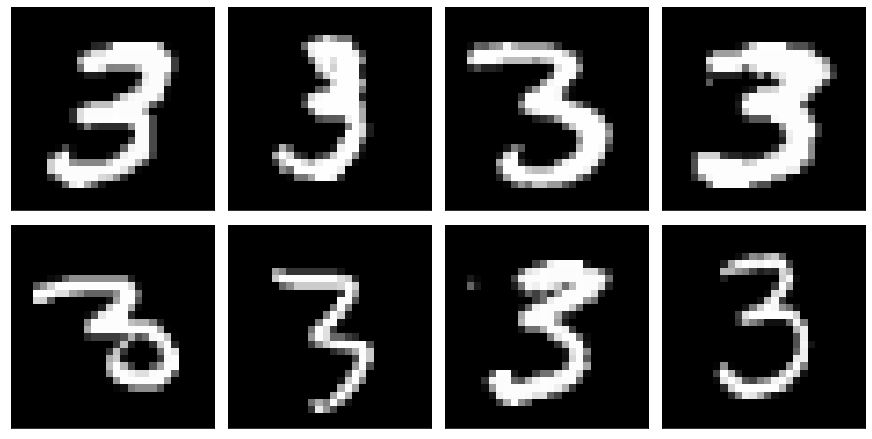

In [310]:
function_results_04(x_train, index_train[3][0:nPlot], nRow, nCol)

## # 05. plot the input images for '4'

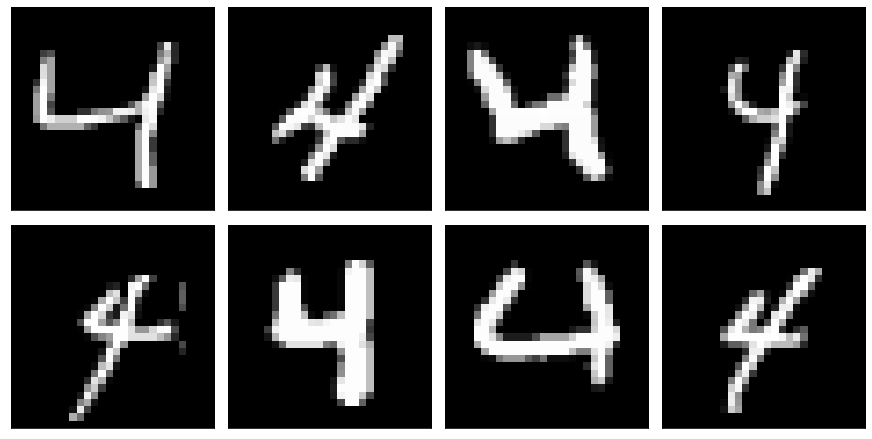

In [313]:
function_results_05(x_train, index_train[4][0:nPlot], nRow, nCol)

## # 06. plot the training loss curve (x-axis: iteration, y-axis: loss)

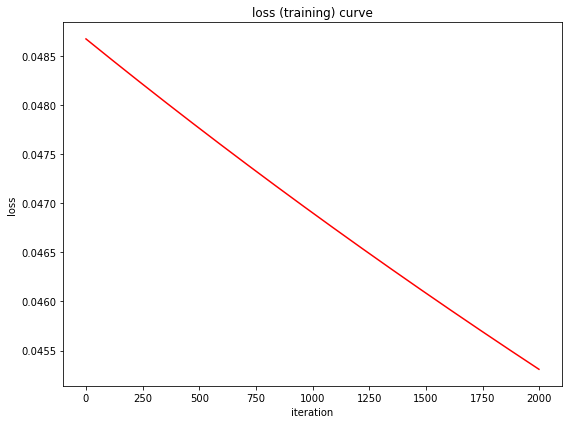

In [318]:
function_results_06(loss_train_iteration, 'iteration', 'loss', 'loss (training) curve')

## # 07. plot the testing loss curve (x-axis: iteration, y-axis: loss)

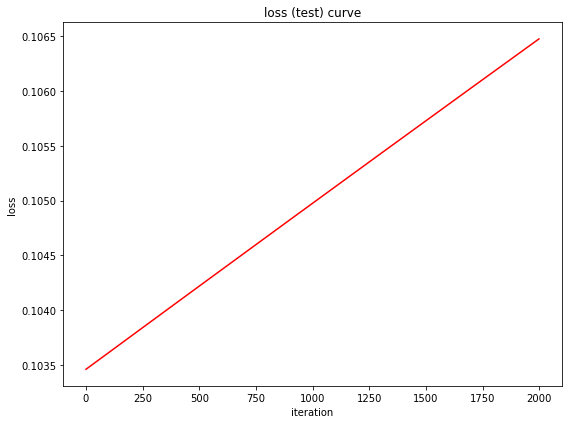

In [319]:
function_results_07(loss_test_iteration, 'iteration', 'loss', 'loss (test) curve')

## # 08. plot the training accuracy curve (x-axis: iteration, y-axis: accuracy)

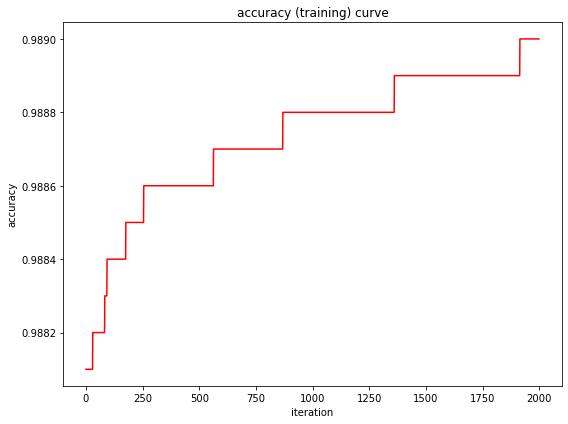

In [322]:
function_results_08(accuracy_train_iteration, 'iteration', 'accuracy', 'accuracy (training) curve')

## # 09. plot the testing accuracy curve (x-axis: iteration, y-axis: accuracy)

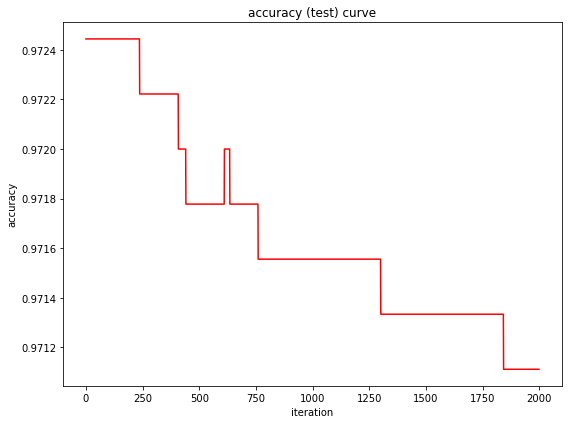

In [323]:
function_results_09(accuracy_test_iteration, 'iteration', 'accuracy', 'accuracy (test) curve')

## # 10. print the training loss at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [40]:
function_results_10(...)

index =    0, value = 0.0000000000
index =  100, value = 0.0000000000
index =  200, value = 0.0000000000
index =  300, value = 0.0000000000
index =  400, value = 0.0000000000
index =  500, value = 0.0000000000
index =  600, value = 0.0000000000
index =  700, value = 0.0000000000
index =  800, value = 0.0000000000
index =  900, value = 0.0000000000


## # 11. print the testing loss at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [41]:
function_results_11(...)

index =    0, value = 0.0000000000
index =  100, value = 0.0000000000
index =  200, value = 0.0000000000
index =  300, value = 0.0000000000
index =  400, value = 0.0000000000
index =  500, value = 0.0000000000
index =  600, value = 0.0000000000
index =  700, value = 0.0000000000
index =  800, value = 0.0000000000
index =  900, value = 0.0000000000


## # 12. print the training accuracy at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [42]:
function_results_12(...)

index =    0, value = 0.0000000000
index =  100, value = 0.0000000000
index =  200, value = 0.0000000000
index =  300, value = 0.0000000000
index =  400, value = 0.0000000000
index =  500, value = 0.0000000000
index =  600, value = 0.0000000000
index =  700, value = 0.0000000000
index =  800, value = 0.0000000000
index =  900, value = 0.0000000000


## # 13. print the testing accuracy at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [43]:
function_results_13(...)

index =    0, value = 0.0000000000
index =  100, value = 0.0000000000
index =  200, value = 0.0000000000
index =  300, value = 0.0000000000
index =  400, value = 0.0000000000
index =  500, value = 0.0000000000
index =  600, value = 0.0000000000
index =  700, value = 0.0000000000
index =  800, value = 0.0000000000
index =  900, value = 0.0000000000
